In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

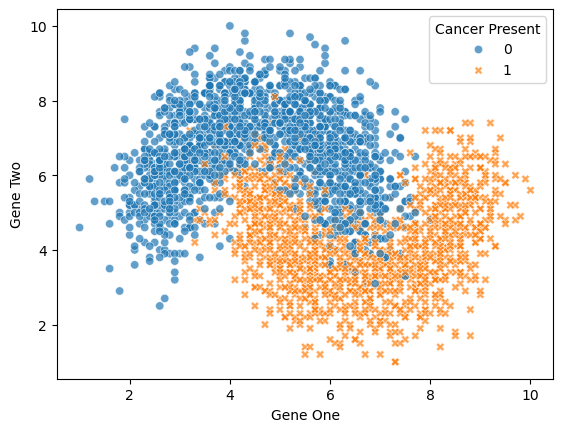

In [9]:
sns.scatterplot(x='Gene One' , y='Gene Two' , data=df , hue='Cancer Present' , style='Cancer Present' , alpha=0.7)

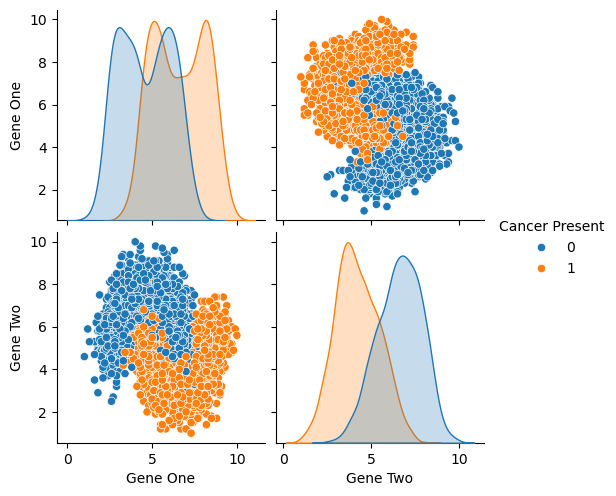

In [10]:
sns.pairplot(hue='Cancer Present',data=df)

In [12]:
X=df.drop('Cancer Present' , axis=1)
y=df['Cancer Present']

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=101,test_size=0.2)

In [18]:
scaler=StandardScaler()

In [23]:
X_train_scaled=scaler.fit_transform(X_train,y_train)

In [24]:
X_test_scaled=scaler.transform(X_test)

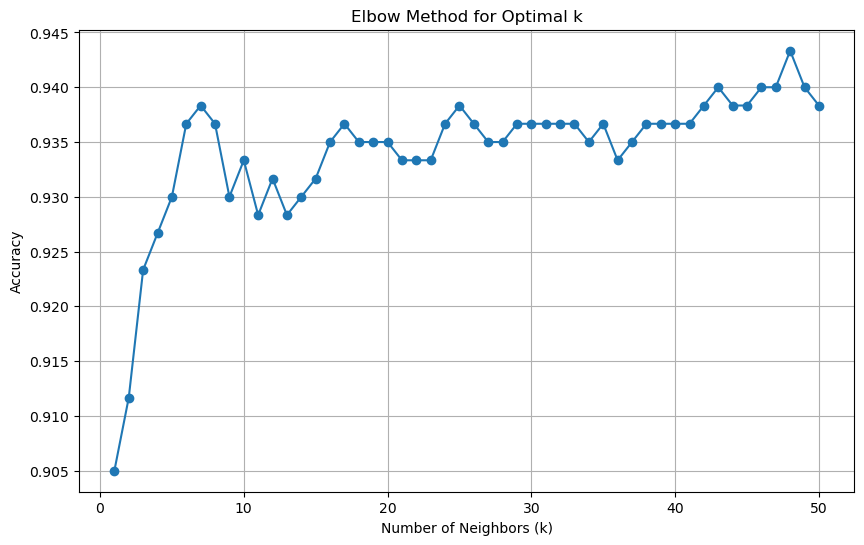

In [36]:
k = 50
accuracies = []

for i in range(1, k + 1):
    k_model = KNeighborsClassifier(n_neighbors=i)
    k_model.fit(X_train_scaled, y_train)
    preds = k_model.predict(X_test_scaled)
    accuracy = accuracy_score(preds, y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, k + 1), accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [40]:
max(accuracies)

0.9433333333333334

In [44]:
diffs = np.diff(accuracies)
k= np.argmax(diffs) + 1 
#+1 because diff reduces the length by 1

In [45]:
k_model = KNeighborsClassifier(n_neighbors=k)
k_model.fit(X_train_scaled, y_train)
preds = k_model.predict(X_test_scaled)
accuracy = accuracy_score(preds, y_test)

In [47]:
print(classification_report(preds , y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       313
           1       0.88      0.94      0.91       287

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

